<a href="https://colab.research.google.com/github/RoseSarlake/spectral-image/blob/main/task5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**readDir()** function reads the 'dir_path'and returns:
'object_raw' - object raw file path

1.   'object_raw' - object raw file path
2.   'object_hdr' - object hdr file path
3.   'white_raw'  - white raw file path
4.   'white_hdr'  - white hdr file path
5.  'dark_raw'   - dark raw file path
6.  'dark_hdr'   - dark hdr file path

**read_hdr()** reads hdr file content and returns:
1. samples
2. bands
3. lines
4. waves - and array of wavelengths from hdr file. Size of bands.

In [3]:
# read dir and search for WHITE, DARK and OBJECT (RAW and HDR)
def readDir(dir_path):
    myDir = os.listdir(dir_path)
    dark_hdr =[]
    dark_raw=[]
    white_hdr=[]
    white_raw=[]
    for file in myDir:
        if 'dark' in file.lower() and 'hdr' in file.lower():
            #dark_hdr = dir_path + '/' + file
            dark_hdr = os.path.join(dir_path, file)
        if 'dark' in file.lower() and 'raw' in file.lower():
            #dark_raw = dir_path + '/' + file
            dark_raw = os.path.join(dir_path, file)
        if 'white' in file.lower() and 'hdr' in file.lower():
            #white_hdr = dir_path + '/' + file
            white_hdr = os.path.join(dir_path, file)
        if 'white' in file.lower() and 'raw' in file.lower():
            #white_raw = dir_path + '/' + file
            white_raw = os.path.join(dir_path, file)
        if (not 'white' in file.lower()) and (not 'dark' in file.lower()) and 'hdr' in file.lower():
            #object_hdr = dir_path + '/' + file
            object_hdr = os.path.join(dir_path, file)
        if (not 'white' in file.lower()) and (not 'dark' in file.lower()) and 'raw' in file.lower():
            #object_raw = dir_path + '/' + file
            object_raw = os.path.join(dir_path, file)
    return object_raw, object_hdr, white_raw, white_hdr, dark_raw, dark_hdr  
import os
import numpy

##### Read HDR content
def read_hdr(hdr_path):
    f=open(hdr_path, "r")
    filelines = f.readlines()
    #print(filelines)
    f.close()
    bands = ''
    for fileline in filelines:
        #print(fileline)
        if 'samples' in fileline.lower():
            samples = int(fileline.replace('samples = ',''))
            print(samples)
        if bands =='' and 'bands' in fileline.lower():
            bands = int(fileline.replace('bands = ',''))
        if 'lines' in fileline.lower():
            lines = int(fileline.replace('lines = ',''))
    # read waves   
    print(samples, lines, bands)
    n = 0
    for fileline in filelines:
        if 'th = {' in fileline.lower():
          print(n)
          n1 = n+1
        n = n + 1
    n2 = n1 + bands
    print(n1)
    print(n2)
    waves = numpy.zeros(n2-n1,)
    n = 0
    for i in range(n1, n2):
        #print(filelines[i])
        waves[n] = float(filelines[i].replace(',',''))
        #print(waves[n])
        n = n + 1
    
    return samples, bands, lines, waves     




'path' is a path to 'capture' folder
the code reads 'spectral_image'

In [4]:
# Read hdr

path = "/content/drive/MyDrive/ASI/ASI course 2021/Measurement sessions (Group1)/Group1_2/IR-powder_sample_0068/capture"

[object_raw, object_hdr, white_raw, white_hdr, dark_raw, dark_hdr ] = readDir(path)
print(object_raw)
[samples, bands, lines, waves] = read_hdr(object_hdr)

open_path = object_raw
# Read raw
fopen = open(open_path, "rb")
raw_image = numpy.fromfile(fopen, dtype=numpy.uint16) #uint16 float32 #count=spatial_pixels*sample_lines*spectral_bands
spectral_image = numpy.reshape(raw_image, (lines, bands, samples))
print('spectral_image.shape: ', spectral_image.shape)

/content/drive/MyDrive/ASI/ASI course 2021/Measurement sessions (Group1)/Group1_2/IR-powder_sample_0068/capture/IR-powder_sample_0068.raw
320
320 738 256
45
46
302
spectral_image.shape:  (738, 256, 320)


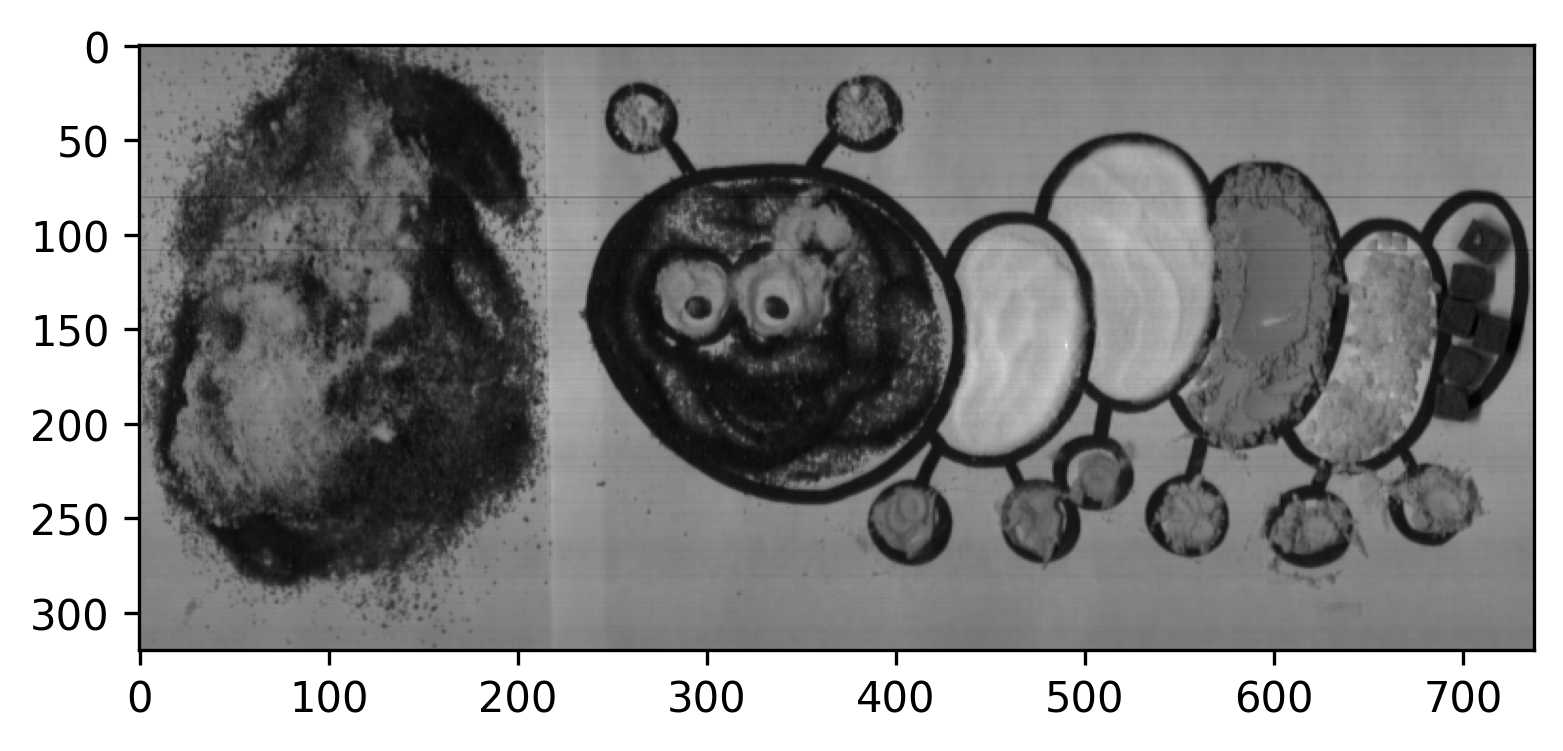

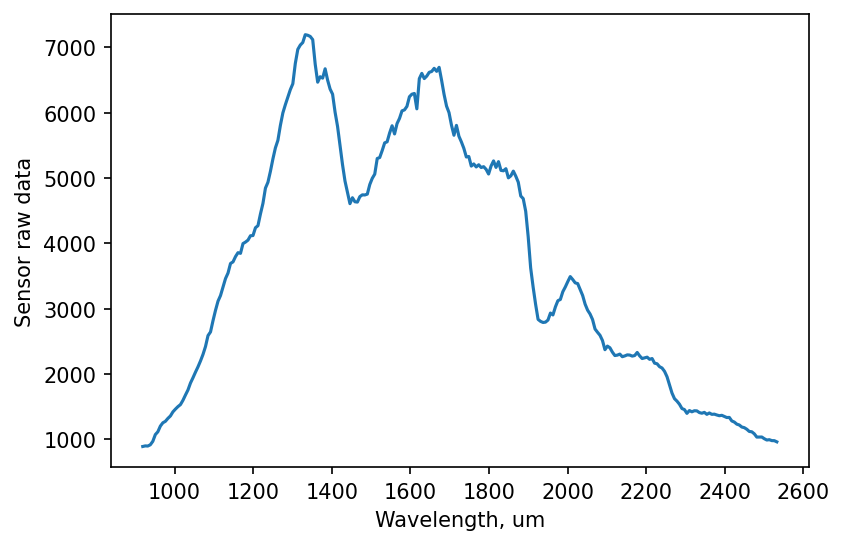

In [6]:
# Plot picture and spectrum

plt.rcParams['figure.dpi'] = 300

#fig.suptitle('Spectral cube slice and single spectrum')
img = spectral_image[:,100,:]
# pale with selected band and vmax=4700
#plt.imshow(numpy.rot90(img), cmap="gray", vmin=0, vmax=4700)
plt.imshow(numpy.rot90(img), cmap="gray") #Ronny
plt.show()
plt.rcParams['figure.dpi'] = 150
plt.plot(waves, spectral_image[600,:,150])#
plt.xlabel('Wavelength, um')
plt.ylabel('Sensor raw data')

plt.show()

White correction
Read White and Dark

/content/drive/MyDrive/ASI/ASI course 2021/Measurement sessions (Group1)/Group1_2/IR-powder_sample_0068/capture/WHITEREF_IR-powder_sample_0068.hdr
320
320 174 256
45
46
302
320 256 174


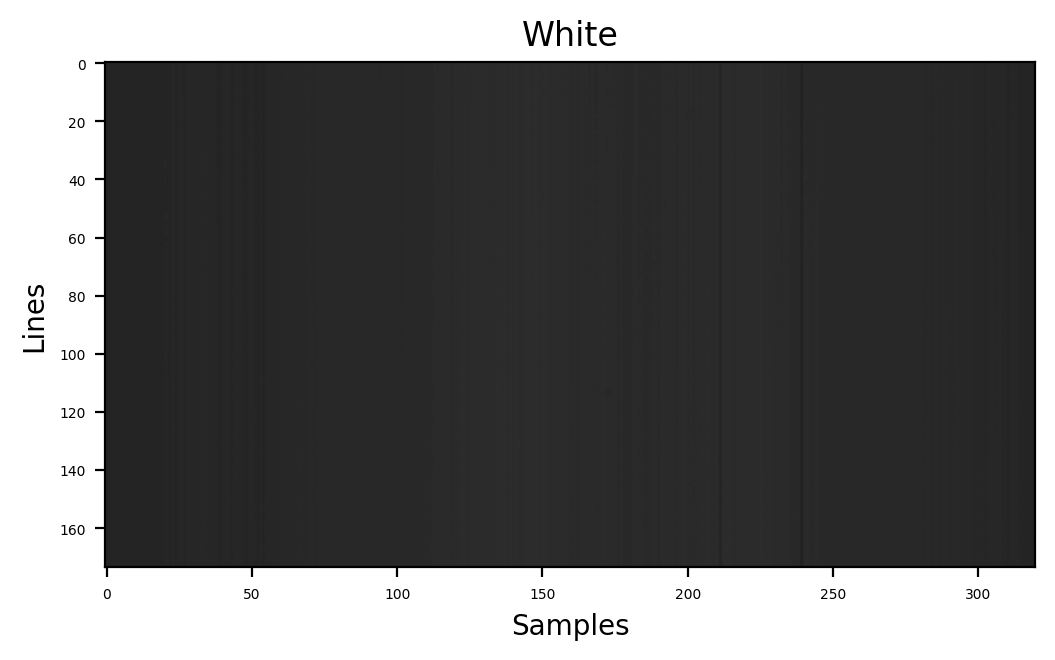

320
320 100 256
45
46
302


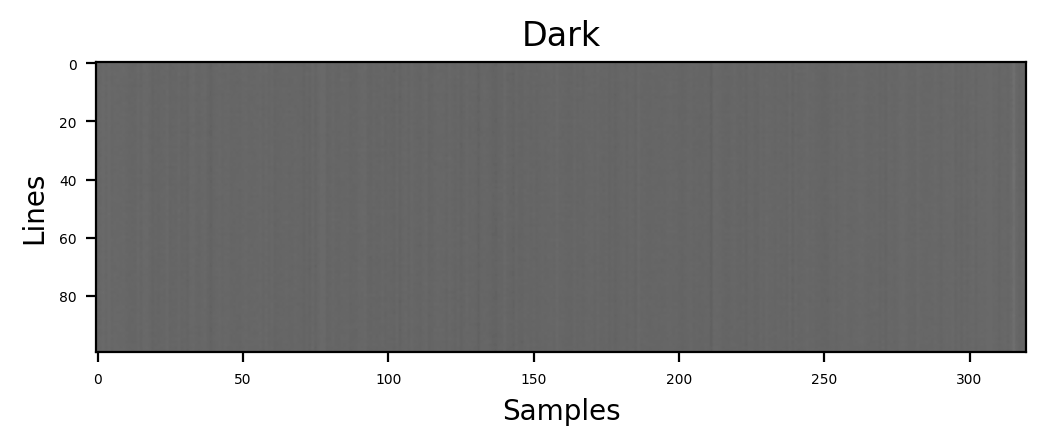

In [7]:
# Read White
print(white_hdr)
[samples, bands, lines, waves] = read_hdr(white_hdr)
print(samples, bands, lines)
open_path = white_raw
fopen = open(open_path, "rb")
raw_image = numpy.fromfile(fopen, dtype=numpy.uint16) #uint16 float32 #count=spatial_pixels*sample_lines*spectral_bands
white_image = numpy.reshape(raw_image, (lines, bands, samples))/lines
plt.rcParams['figure.dpi'] = 200
plt.imshow(white_image[:,100,:], cmap="gray", vmin=0, vmax=500)#
plt.title("White")
plt.xlabel('Samples')
plt.ylabel('Lines')
plt.tick_params(axis='both', which='major', labelsize=5)
plt.show()
###############################################
# Read Dark
[samples, bands, lines, waves] = read_hdr(dark_hdr)
open_path = dark_raw
fopen = open(open_path, "rb")
raw_image = numpy.fromfile(fopen, dtype=numpy.uint16) #uint16 float32 #count=spatial_pixels*sample_lines*spectral_bands
dark_image = numpy.reshape(raw_image, (lines, bands, samples))/lines

plt.rcParams['figure.dpi'] = 200
plt.imshow(dark_image[:,100,:], cmap="gray", vmin=0, vmax=20)#
plt.title("Dark")
plt.tick_params(axis='both', which='major', labelsize=5)
plt.xlabel('Samples')
plt.ylabel('Lines')
plt.show()


In [8]:
# Calculate average for Dark and White

# Spectral_cube = upper_part/lower_part
# upper_part = spectral_image-dark
# lower_part = white - dark

white_av = numpy.sum(white_image, axis = 0) # get average for White
#print(white_image.shape)
#print(white_av.shape)
dark_av = numpy.sum(dark_image, axis = 0) # get average for White
#print(dark_image.shape)
#print(dark_av.shape)

[lines, bansd, samples] = spectral_image.shape
print(spectral_image.shape)
upper_part = numpy.zeros((lines, bansd, samples), dtype=numpy.float32)
spectral_cube = numpy.zeros((lines, bansd, samples), dtype=numpy.float32)
# Subtract [image - dark]
for i in range(lines):
  upper_part[i,:,:] = numpy.subtract(spectral_image[i,:,:], dark_av) 
# Subtract [white - dark]
lower_part = numpy.subtract(white_av, dark_av) 
# Subtract [image - dark]
for i in range(lines):
  spectral_cube[i,:,:] = numpy.divide(upper_part[i,:,:], lower_part)
# spectral_cube[:,:,:]  a white corrected spectral cube




(738, 256, 320)


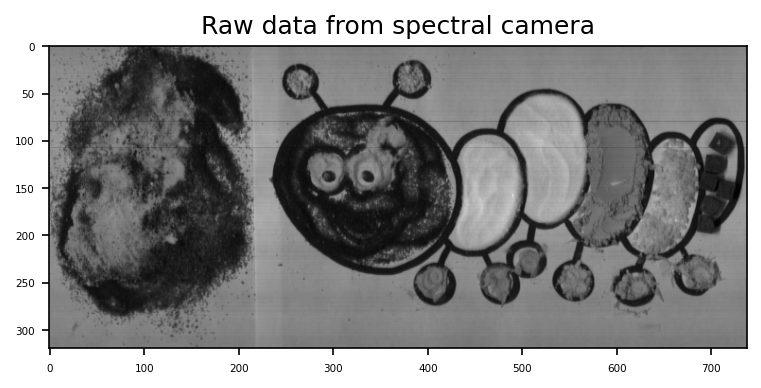

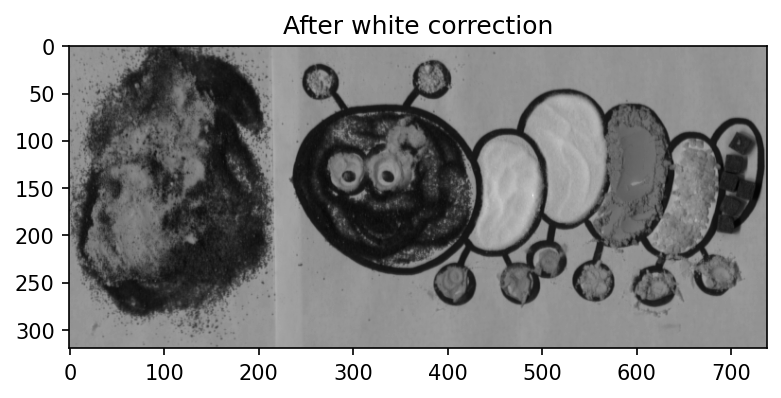

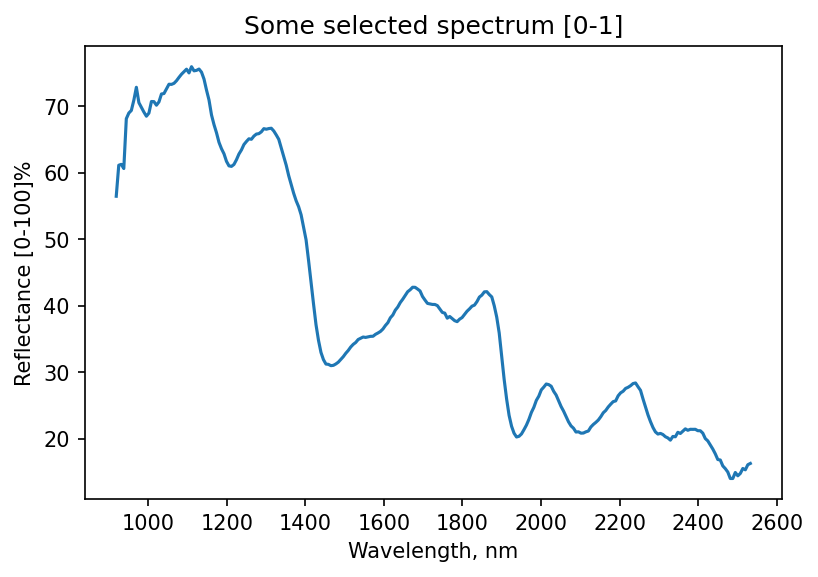

In [9]:
# Plot results before and after white correction
plt.rcParams['figure.dpi'] = 150
# plt.imshow(numpy.rot90(spectral_image[:,100,:]), cmap="gray", vmin=0, vmax=10050)#
plt.imshow(numpy.rot90(spectral_image[:,100,:]), cmap="gray")# Ronny
plt.title("Raw data from spectral camera")
plt.tick_params(axis='both', which='major', labelsize=5)
plt.show()
# plt.imshow(numpy.rot90(spectral_cube[:,100,:]), cmap="gray", vmin=0, vmax= 1)#
plt.imshow(numpy.rot90(spectral_cube[:,100,:]), cmap="gray")# Ronny
plt.title("After white correction")
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()
plt.plot(waves, spectral_cube[600,:,150]*100)#
plt.title("Some selected spectrum [0-1]")
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel('Wavelength, nm')
plt.ylabel('Reflectance [0-100]%')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1427.32
1046.76
1193.1


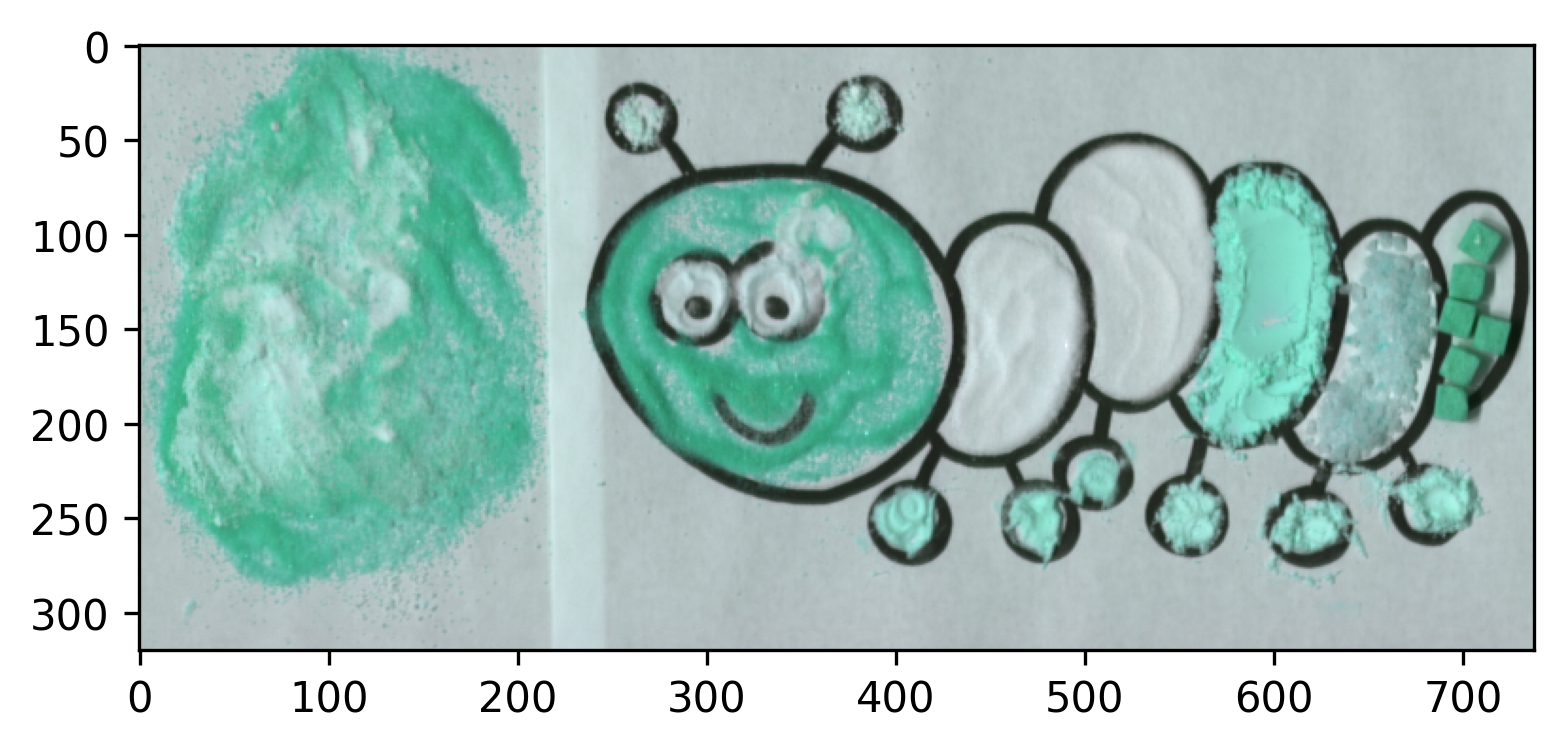

In [22]:
# Show RGB image
# plt.rcParams['figure.dpi'] = 50, make it bigger to get bigger image
RGB = numpy.empty((lines, samples, 3), dtype=numpy.float32)
# ch_1 = 70
# ch_2 = 53
# ch_3 = 19
ch_1 = 80
ch_2 = 20
ch_3 = 43
print(waves[ch_1])
print(waves[ch_2])
print(waves[ch_3])
#RGB[:,:,0] = spectral_image[:,ch_1,:]/numpy.amax(spectral_image[:,ch_1,:])
#RGB[:,:,1] = spectral_image[:,ch_2,:]/numpy.amax(spectral_image[:,ch_2,:])
#RGB[:,:,2] = spectral_image[:,ch_3,:]/numpy.amax(spectral_image[:,ch_3,:])
RGB[:,:,0] = spectral_cube[:,ch_1,:]
RGB[:,:,1] = spectral_cube[:,ch_2,:]
RGB[:,:,2] = spectral_cube[:,ch_3,:]
plt.rcParams['figure.dpi'] = 300
plt.imshow(numpy.rot90(RGB))

plt.show()

[0.4934827 0.764553  0.6892494]


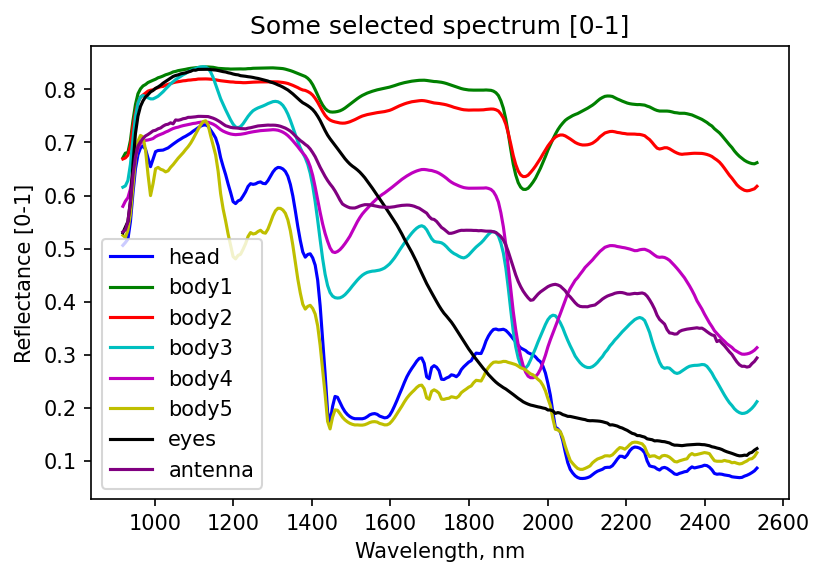

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


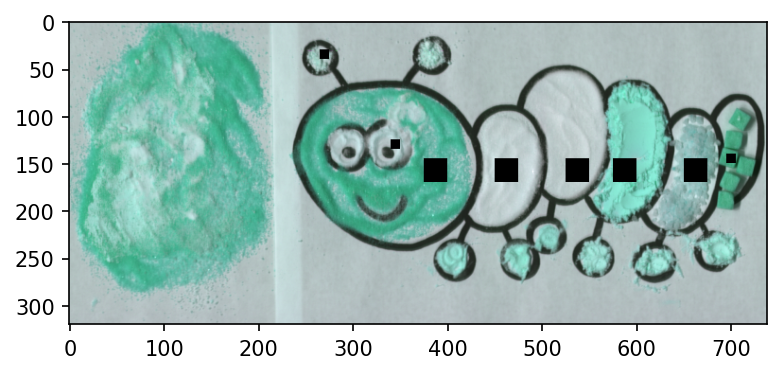

'\n# save \nsaveraw = "/content/drive/My Drive/Colab Notebooks/Temp/green.raw"\nfileobj = open(saveraw, mode=\'wb\')\nselection1.tofile(fileobj)\nfileobj.close()\n'

In [27]:
# Selct area and plot its avearage spectrum
print(RGB[100,100,:])
RGB2 = RGB.copy()
##################################################################
# Select 1, HEAD 1
x1 = 375
x2 = 400
y1 = 150
y2 = 175 
RGB2[x1:x2,y1:y2,0] = 0
RGB2[x1:x2,y1:y2,1] = 0
RGB2[x1:x2,y1:y2,2] = 0
#RGB2[:,:,0] = 255
sel = spectral_cube[x1:x2,:,y1:y2]
sel1 = numpy.sum(sel, axis = 0)
selection1 = numpy.sum(sel1, axis =1)/((x2-x1)*(y2-y1))
plt.plot(waves,selection1,'b',label='head') 
##################################################################
# Select 2, BODY 1
x1 = 450
x2 = 475
y1 = 150
y2 = 175 
RGB2[x1:x2,y1:y2,0] = 0
RGB2[x1:x2,y1:y2,1] = 0
RGB2[x1:x2,y1:y2,2] = 0
#RGB2[:,:,0] = 255
sel = spectral_cube[x1:x2,:,y1:y2]
sel1 = numpy.sum(sel, axis = 0)
selection2 = numpy.sum(sel1, axis =1)/((x2-x1)*(y2-y1))
plt.plot(waves,selection2, 'g',label='body1') 
##################################################################
# Select 3, BODY 2
x1 = 525
x2 = 550
y1 = 150
y2 = 175 
RGB2[x1:x2,y1:y2,0] = 0
RGB2[x1:x2,y1:y2,1] = 0
RGB2[x1:x2,y1:y2,2] = 0
#RGB2[:,:,0] = 255
sel = spectral_cube[x1:x2,:,y1:y2]
sel1 = numpy.sum(sel, axis = 0)
selection3 = numpy.sum(sel1, axis =1)/((x2-x1)*(y2-y1))
plt.plot(waves,selection3, 'r', label='body2') 
##################################################################
# Select 4, BODY 3
x1 = 575
x2 = 600
y1 = 150
y2 = 175 
RGB2[x1:x2,y1:y2,0] = 0
RGB2[x1:x2,y1:y2,1] = 0
RGB2[x1:x2,y1:y2,2] = 0
#RGB2[:,:,0] = 255
sel = spectral_cube[x1:x2,:,y1:y2]
sel1 = numpy.sum(sel, axis = 0)
selection4 = numpy.sum(sel1, axis =1)/((x2-x1)*(y2-y1))
plt.plot(waves,selection4, 'c',label='body3') 
##################################################################
# Select 5, BODY 4
x1 = 650
x2 = 675
y1 = 150
y2 = 175 
RGB2[x1:x2,y1:y2,0] = 0 # Make RGB black to see selection
RGB2[x1:x2,y1:y2,1] = 0
RGB2[x1:x2,y1:y2,2] = 0
#RGB2[:,:,0] = 255
sel = spectral_cube[x1:x2,:,y1:y2] # crop spectral cube
sel1 = numpy.sum(sel, axis = 0)
selection5 = numpy.sum(sel1, axis =1)/((x2-x1)*(y2-y1)) # devide by the number of pixels in selection
plt.plot(waves,selection5, 'm',label='body4') 
##################################################################
# Select 6, BODY 5
x1 = 695
x2 = 705
y1 = 170
y2 = 180 
RGB2[x1:x2,y1:y2,0] = 0 # Make RGB black to see selection
RGB2[x1:x2,y1:y2,1] = 0
RGB2[x1:x2,y1:y2,2] = 0
#RGB2[:,:,0] = 255
sel = spectral_cube[x1:x2,:,y1:y2] # crop spectral cube
sel1 = numpy.sum(sel, axis = 0)
selection6 = numpy.sum(sel1, axis =1)/((x2-x1)*(y2-y1)) # devide by the number of pixels in selection
plt.plot(waves,selection6, 'y',label='body5') 
##################################################################

# Select 7, EYE 1
x1 = 340
x2 = 350
y1 = 185
y2 = 195 
RGB2[x1:x2,y1:y2,0] = 0
RGB2[x1:x2,y1:y2,1] = 0
RGB2[x1:x2,y1:y2,2] = 0
#RGB2[:,:,0] = 255
sel = spectral_cube[x1:x2,:,y1:y2]
sel1 = numpy.sum(sel, axis = 0)
selection7 = numpy.sum(sel1, axis =1)/((x2-x1)*(y2-y1))
plt.plot(waves,selection7, 'k',label='eyes') 
##################################################################
# Select 8, ANTENA 1
x1 = 265
x2 = 275
y1 = 280
y2 = 290 
RGB2[x1:x2,y1:y2,0] = 0
RGB2[x1:x2,y1:y2,1] = 0
RGB2[x1:x2,y1:y2,2] = 0
#RGB2[:,:,0] = 255
sel = spectral_cube[x1:x2,:,y1:y2]
sel1 = numpy.sum(sel, axis = 0)
selection8 = numpy.sum(sel1, axis =1)/((x2-x1)*(y2-y1))
plt.rcParams['figure.dpi'] = 150
plt.plot(waves,selection8, 'purple',label='antenna') 
##################################################################
plt.title("Some selected spectrum [0-1]")
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel('Wavelength, nm')
plt.ylabel('Reflectance [0-1]')
plt.legend(loc="lower left")
plt.show()


### Show RGB previes #############################################
plt.rcParams['figure.dpi'] = 150
plt.imshow(numpy.rot90(RGB2))

plt.show()


'''
# save 
saveraw = "/content/drive/My Drive/Colab Notebooks/Temp/green.raw"
fileobj = open(saveraw, mode='wb')
selection1.tofile(fileobj)
fileobj.close()
'''


In [37]:
for i in range(len(waves)):
  print(f"band {i} is {waves[i]} nm")

band 0 is 918.91 nm
band 1 is 925.31 nm
band 2 is 931.72 nm
band 3 is 938.13 nm
band 4 is 944.53 nm
band 5 is 950.93 nm
band 6 is 957.33 nm
band 7 is 963.73 nm
band 8 is 970.12 nm
band 9 is 976.52 nm
band 10 is 982.91 nm
band 11 is 989.3 nm
band 12 is 995.69 nm
band 13 is 1002.08 nm
band 14 is 1008.47 nm
band 15 is 1014.85 nm
band 16 is 1021.24 nm
band 17 is 1027.62 nm
band 18 is 1034.0 nm
band 19 is 1040.38 nm
band 20 is 1046.76 nm
band 21 is 1053.14 nm
band 22 is 1059.51 nm
band 23 is 1065.89 nm
band 24 is 1072.26 nm
band 25 is 1078.63 nm
band 26 is 1085.0 nm
band 27 is 1091.37 nm
band 28 is 1097.74 nm
band 29 is 1104.11 nm
band 30 is 1110.47 nm
band 31 is 1116.83 nm
band 32 is 1123.2 nm
band 33 is 1129.56 nm
band 34 is 1135.92 nm
band 35 is 1142.28 nm
band 36 is 1148.63 nm
band 37 is 1154.99 nm
band 38 is 1161.34 nm
band 39 is 1167.7 nm
band 40 is 1174.05 nm
band 41 is 1180.4 nm
band 42 is 1186.75 nm
band 43 is 1193.1 nm
band 44 is 1199.45 nm
band 45 is 1205.8 nm
band 46 is 1212.14 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1616.51
2152.06
1962.84


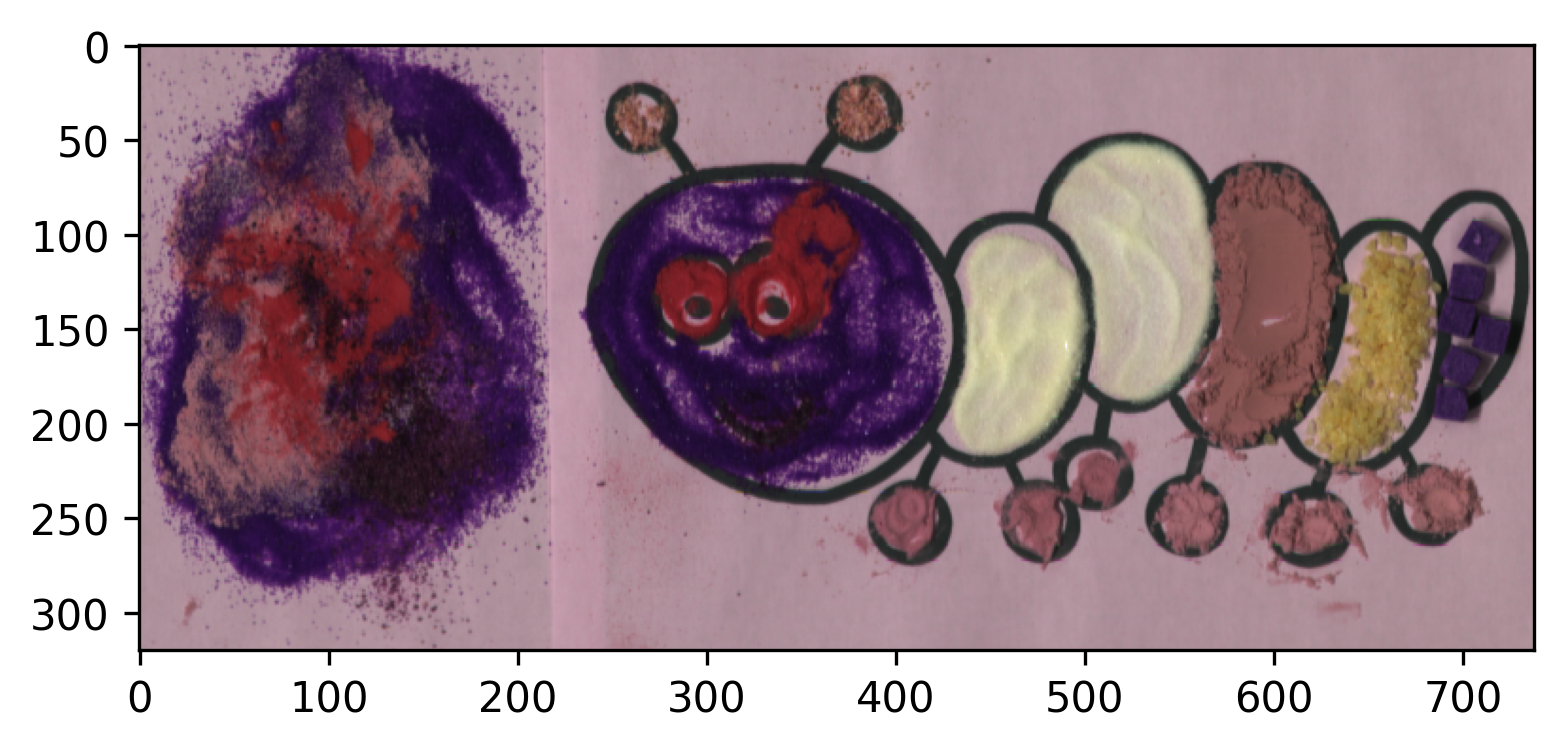

In [62]:
# Show RGB image with new colors!
# plt.rcParams['figure.dpi'] = 50, make it bigger to get bigger image
RGB = numpy.empty((lines, samples, 3), dtype=numpy.float32)
ch_1 = 110 # 1616.51 nm

ch_2 = 195 # 2152.06 nm

ch_3 = 165 # 1962.84 nm

print(waves[ch_1])
print(waves[ch_2])
print(waves[ch_3])
#RGB[:,:,0] = spectral_image[:,ch_1,:]/numpy.amax(spectral_image[:,ch_1,:])
#RGB[:,:,1] = spectral_image[:,ch_2,:]/numpy.amax(spectral_image[:,ch_2,:])
#RGB[:,:,2] = spectral_image[:,ch_3,:]/numpy.amax(spectral_image[:,ch_3,:])
RGB[:,:,0] = spectral_cube[:,ch_1,:]
RGB[:,:,1] = spectral_cube[:,ch_2,:]
RGB[:,:,2] = spectral_cube[:,ch_3,:]
plt.rcParams['figure.dpi'] = 300
plt.imshow(numpy.rot90(RGB))

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(256,)
2158.37
1585.01
1205.8


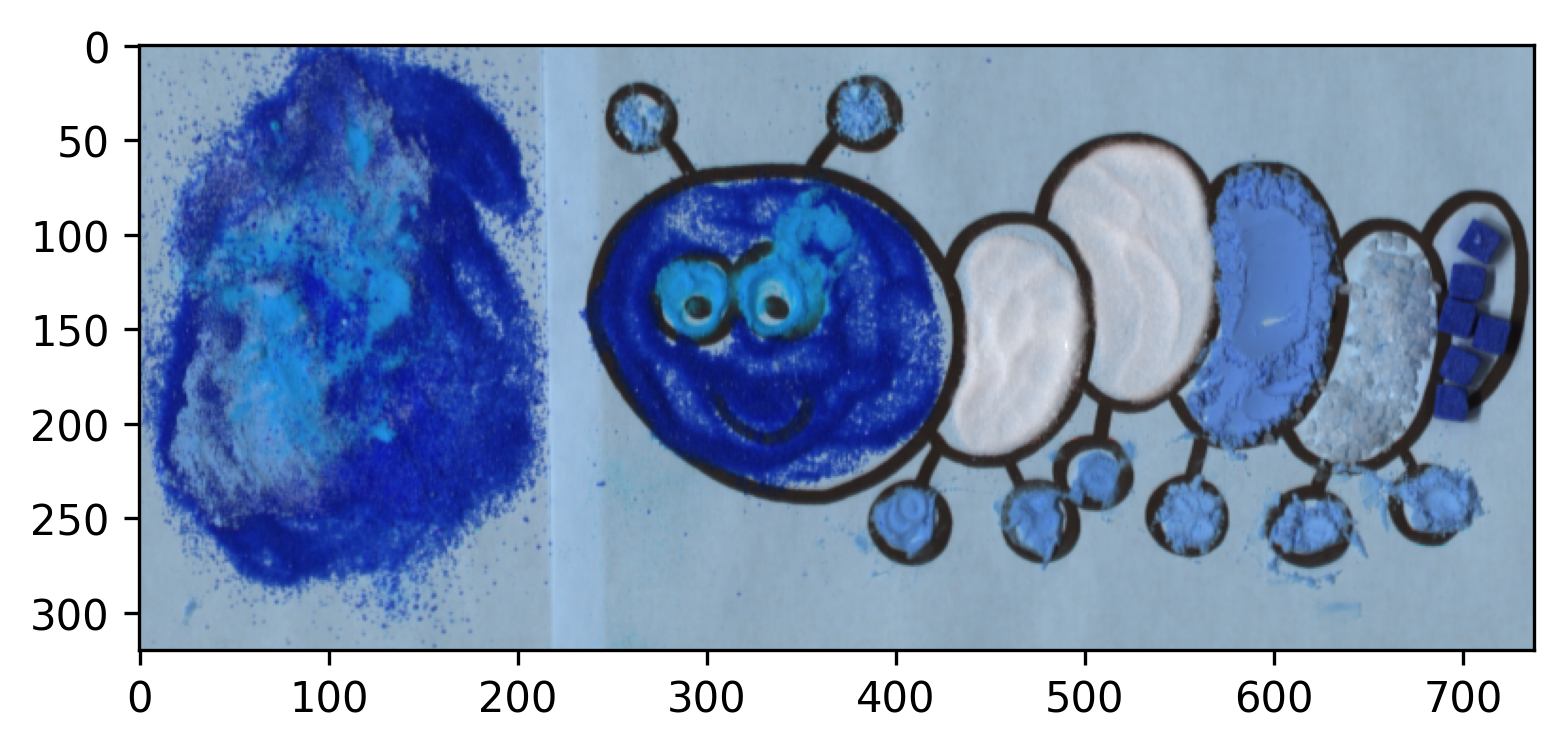

In [ ]:
# Show RGB image with automatic optimization! Ronny
# plt.rcParams['figure.dpi'] = 50, make it bigger to get bigger image
RGB = numpy.empty((lines, samples, 3), dtype=numpy.float32)

# calculate the maximum differences between the 7 spectra based on the variance
matrixOfSpectrum = numpy.row_stack((selection1,selection2,selection3,selection4,selection5,selection6,selection7))
varianceForEachWavelenght = numpy.var(matrixOfSpectrum, axis=0)
print(numpy.shape(varianceForEachWavelenght))

# BLUE CHANNEL INDEX  1 - 69
max_index = numpy.argmax(varianceForEachWavelenght[1:69])
blue_max_index = max_index + 1

# GREEN CHANNEL INDEX  94 - 162
max_index = numpy.argmax(varianceForEachWavelenght[94:162])
green_max_index = max_index + 94

# RED CHANNEL INDEX  187 - 255
max_index = numpy.argmax(varianceForEachWavelenght[187:255])
red_max_index = max_index + 187

ch_1 = red_max_index
ch_2 = green_max_index
ch_3 = blue_max_index

print(waves[ch_1])
print(waves[ch_2])
print(waves[ch_3])
#RGB[:,:,0] = spectral_image[:,ch_1,:]/numpy.amax(spectral_image[:,ch_1,:])
#RGB[:,:,1] = spectral_image[:,ch_2,:]/numpy.amax(spectral_image[:,ch_2,:])
#RGB[:,:,2] = spectral_image[:,ch_3,:]/numpy.amax(spectral_image[:,ch_3,:])
RGB[:,:,0] = spectral_cube[:,ch_1,:]
RGB[:,:,1] = spectral_cube[:,ch_2,:]
RGB[:,:,2] = spectral_cube[:,ch_3,:]
plt.rcParams['figure.dpi'] = 300
plt.imshow(numpy.rot90(RGB))

plt.show()